## Assignment 3

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

### 1. Inference for normal mean and deviation

We load the data and get some basic descriptive stats:

In [2]:
y_1 = np.loadtxt('../data/windshieldy1.txt')

n = y_1.shape[0]        # number of samples
s2 = y_1.var(ddof = 1)  # sample variance
my = y_1.mean()         # sample mean

print('y_1 descriptive stats:')
print('-' * 32)
print('n  : {:>7d}  (number of samples)'.format(n))
print('s2 : {:>7.4f}  (sample variance)'.format(s2))
print('my : {:>7.4f}  (sample mean)'.format(my))

y_1 descriptive stats:
--------------------------------
n  :       9  (number of samples)
s2 :  2.1732  (sample variance)
my : 14.6112  (sample mean)


Since we assume normal data we use an uninformative uniform prior, e.g. uniform on $(\mu, \mathrm{log}(\sigma))$ cf. the book (p. 64). We sample $\sigma^2$ from the marginal posterior distribution cf. (3.5):

$$\sigma^2 \; | \; y \sim \mathrm{Inv-}\chi^2(n - 1, s^2)$$

We then sample $\mu$ from the conditional postrior distribution cf. (3.3):

$$\mu \; | \; \sigma^2, \, y \sim N \left(\bar{y}, \, \frac{\sigma^2}{n} \right)$$

This is equivalent of sampling from a $t$ distribution, with location $\bar{y}$, scale $\left( \dfrac{s^2}{n} \right)^\frac{1}{2}$ and $n - 1$ degress of freedom.

In [3]:
deg_free = n - 1
scale_mu = np.sqrt(s2/n)
posterior_mu = stats.t(deg_free, loc = my, scale = scale_mu)

#### a) What can you say about the unknown $\mu$?
Summarize your results using Bayesian point and interval estimates and plot the density.

The expected value of $\mu$ is **14.61**, and the central 95%-confidence interval is **13.48 - 15.74**.

In [4]:
mu = posterior_mu.mean()
low, upr = posterior_mu.interval(.95)
print('Posterior Mean Expected Value : {:.2f}'.format(mu))
print('Posterior Mean 95% central CI : {:.2f} - {:.2f}'.format(low, upr))

Posterior Mean Expected Value : 14.61
Posterior Mean 95% central CI : 13.48 - 15.74


We plot the density of $\mu$:

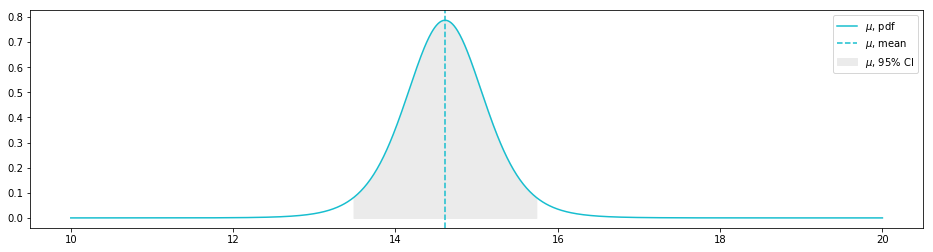

In [5]:
x = np.linspace(10, 20, 1000)
pd = posterior_mu.pdf(x)

fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(x, pd, label = '$\mu$, pdf', color = 'C9')
ax.axvline(mu, color='C9', label = '$\mu$, mean', linestyle = '--')
x_95_idx = (x > low) & (x < upr)
plt.fill_between(x[x_95_idx], pd[x_95_idx], color='0.92', label = '$\mu$, 95% CI')
ax.legend(loc = 'upper right')
None


#### b) What can you say about the hardness of the next windshield coming from the production line before actually measuring the hardness?
Summarize your results using Bayesian point and interval estimates and plot the density.

We sample from the posterior *predictive* distribution. From the book (p. 66) we find that this is equivalent of sampling from a $t$ distribution, with location $\bar{y}$, scale $s \left(1 + \dfrac{1}{n} \right)^\frac{1}{2}$ and $n - 1$ degress of freedom.

In [6]:
scale_pred = np.sqrt((1 + 1/n) * s2)
posterior_pred = stats.t(deg_free, loc = my, scale = scale_pred)

The expected hardness of next windshield, $\tilde{y}$ is still **14.61**, but the central 95%-predictive interval is **11.03 - 18.19**. As expected the uncertainty is higher for prediction of a single windshield, compared the the uncertainty of the mean, $\mu$.

In [7]:
pred_mean = posterior_pred.mean()
pred_low, pred_upr = posterior_pred.interval(.95)
print('Posterior Predictive Expected Value : {:.2f}'.format(pred_mean))
print('Posterior Predictive 95% central PI : {:.2f} - {:.2f}'.format(pred_low, pred_upr))

Posterior Predictive Expected Value : 14.61
Posterior Predictive 95% central PI : 11.03 - 18.19


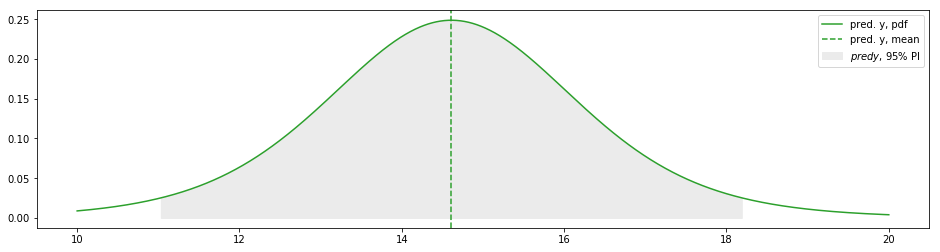

In [8]:
x = np.linspace(10, 20, 1000)
pd = posterior_pred.pdf(x)

fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(x, pd, label = 'pred. y, pdf', color = 'C2')
ax.axvline(pred_mean, color='C2', label = 'pred. y, mean', linestyle = '--')
x_95_idx = (x > pred_low) & (x < pred_upr)
plt.fill_between(x[x_95_idx], pd[x_95_idx], color='0.92', label = '$pred y$, 95% PI')
ax.legend(loc = 'upper right')
None

### 2. Inference for difference between proportions 

From the text we know:

In [9]:
n_control = 674
y_control = 39
n_treatment = 680
y_treatment = 22

#### a) Summarize the posterior distribution for the odds ratio, $(p_1 /(1−p_1 ))/(p_0 /(1−p_0))$. Compute the point and interval estimates and plot the histogram.

Since the data are independent and binomially distributed, we use a uniform prior and Beta-posterior:

In [10]:
posterior_control = stats.beta(1 + y_control, 1 + n_control - y_control)
posterior_treatment = stats.beta(1 + y_treatment, 1 + n_treatment - y_treatment)

We sample from the two posterior distributions:

In [11]:
sample_size = 1000
p_0 = posterior_control.rvs(sample_size)
p_1 = posterior_treatment.rvs(sample_size)

From the sample we calculate the odds ratio:

In [12]:
odds_ratio = (p_1/(1 - p_1))/(p_0/(1 - p_0))

The expected value of the odds ratio is $0.57$, and the 95% central interval is: $0.33 - 0.91$.

In [13]:
print('Odds Ratio Expected Value : {:.2f}'.format(odds_ratio.mean()))
print('Odds Ratio 95% central CI : {:.2f} - {:.2f}'.format(*tuple(np.percentile(odds_ratio, q = [2.5, 97.5]))))

Odds Ratio Expected Value : 0.58
Odds Ratio 95% central CI : 0.33 - 0.98


We blot the histogram along with the expected value and a (gaussian) kernal density estimation:

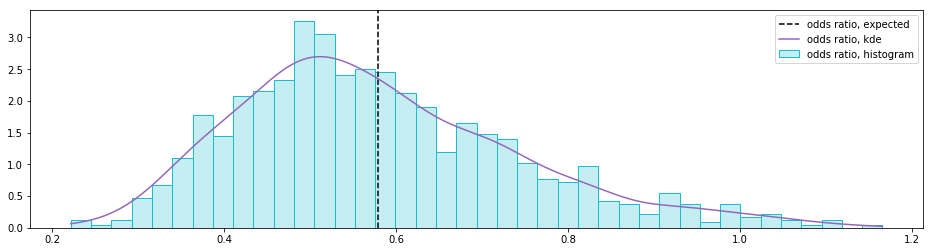

In [14]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.hist(odds_ratio, normed = True, bins = 40, fc=(23/255, 190/255, 207/255, 0.25), linestyle = '-', linewidth = 1, label = 'odds ratio, histogram', edgecolor='C9')
ax.axvline(odds_ratio.mean(), color='Black',  label = 'odds ratio, expected', linestyle = '--')
x = np.linspace(odds_ratio.min(), odds_ratio.max(), 1000)
odds_ratio_kde = stats.gaussian_kde(odds_ratio).evaluate(x)
ax.plot(x, odds_ratio_kde, color = 'C4',  label = 'odds ratio, kde')
ax.legend(loc = 'upper right')
None

#### b) Discuss the sensitivity of your inference to your choice of prior density with a couple of sentences.

Since the uniform prior is unformative, the observed data is very dominant. We compare the choosen uniform prior with the avarage death/survival rate without respect to treatment/control groupping. Since the death percentage is around $4.5\%$ we chosse $\mathrm{beta}(1, 21)$, which is approx. $4.5\%$.

Uniform prior
- Odds Ratio Expected Value : 0.56
- Odds Ratio 95% central CI : 0.31 - 0.90
Beta(avg. died, avg. sur.) prior
- Odds Ratio Expected Value : 0.57
- Odds Ratio 95% central CI : 0.34 - 0.89


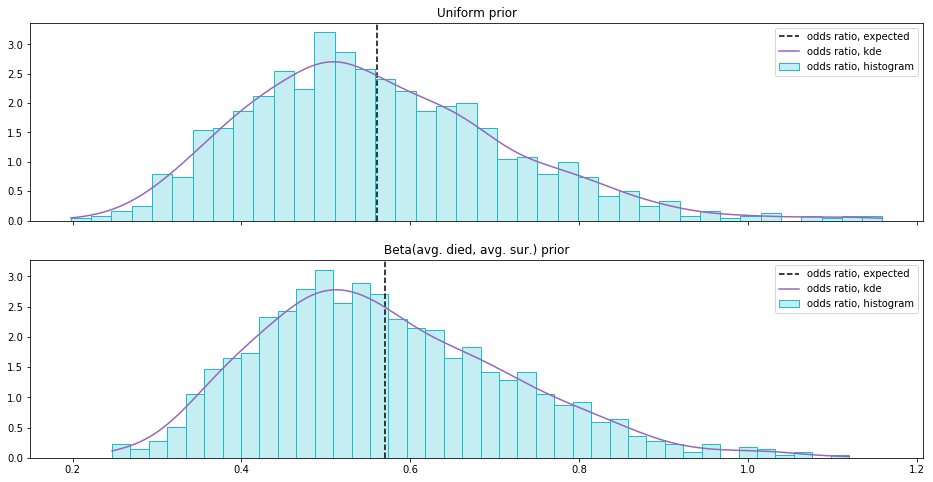

In [15]:
priors = [
    (1, 1, 'Uniform prior'), 
    (1, 21, 'Beta(avg. died, avg. sur.) prior')
]

fig, ax = plt.subplots(nrows = len(priors), figsize = (16, 4 * len(priors)), sharex = True)
for i in range(len(priors)):    
    a, b, title = priors[i]
    _p_0 = stats.beta(a + y_control, b + n_control - y_control).rvs(sample_size)
    _p_1 = stats.beta(a + y_treatment, b + n_treatment - y_treatment).rvs(sample_size)
    _odds_ratio = (_p_1/(1 - _p_1))/(_p_0/(1 - _p_0))
    
    ax[i].set_title(title)
    ax[i].hist(_odds_ratio, normed = True, bins = 40, fc=(23/255, 190/255, 207/255, 0.25), linestyle = '-', linewidth = 1, label = 'odds ratio, histogram', edgecolor='C9')
    ax[i].axvline(_odds_ratio.mean(), color='Black',  label = 'odds ratio, expected', linestyle = '--')
    _x = np.linspace(_odds_ratio.min(), _odds_ratio.max(), 1000)
    _odds_ratio_kde = stats.gaussian_kde(_odds_ratio).evaluate(_x)
    ax[i].plot(_x, _odds_ratio_kde, color = 'C4',  label = 'odds ratio, kde')
    ax[i].legend(loc = 'upper right')
    
    print(title)
    print('- Odds Ratio Expected Value : {:.2f}'.format(_odds_ratio.mean()))
    print('- Odds Ratio 95% central CI : {:.2f} - {:.2f}'.format(*tuple(np.percentile(_odds_ratio, q = [2.5, 97.5]))))
    

We see the odds ratio posterior are very similar, so given there a no other information present, we can accept both priors.

###  Inference for difference between normal means

We load the data, compute basic statistics (mean and scale) and use the $t$ distribution as above as posterior:

In [16]:
y_1 = np.loadtxt('../data/windshieldy1.txt')
y_2 = np.loadtxt('../data/windshieldy2.txt')

n_1,  n_2  = y_1.shape[0]      , y_2.shape[0]         # number of samples
s2_1, s2_2 = y_1.var(ddof = 1) , y_2.var(ddof = 1)    # sample variance
my_1, my_2 = y_1.mean()        , y_2.mean()           # sample mean

df_1, df_2 = n_1 - 1           , n_2 - 1              # degree of freedom
sc_1, sc_2 = np.sqrt(s2_1/n_1) , np.sqrt(s2_2/n_2)    # scaling

posterior_1 = stats.t(df_1, loc = my_1, scale = sc_1)
posterior_2 = stats.t(df_2, loc = my_2, scale = sc_2)

We sample $\mu_1$ and $\mu_2$ from each of the joint distributions:

In [17]:
mu_1 = posterior_1.rvs(sample_size)
mu_2 = posterior_2.rvs(sample_size)

And calculate $\mu_d = \mu_1 - \mu_2$:

In [18]:
mu_d = mu_1 - mu_2

#### a) What can you say about $\mu_d = \mu_1 - \mu_2$?
Summarize your results using Bayesian point and interval estimates and plot the histogram.

In [19]:
print('Diff. Expected Value : {:.2f}'.format(mu_d.mean()))
print('Diff. 95% central CI : {:.2f} - {:.2f}'.format(*tuple(np.percentile(mu_d, q = [2.5, 97.5]))))

Diff. Expected Value : -1.21
Diff. 95% central CI : -2.43 - 0.02


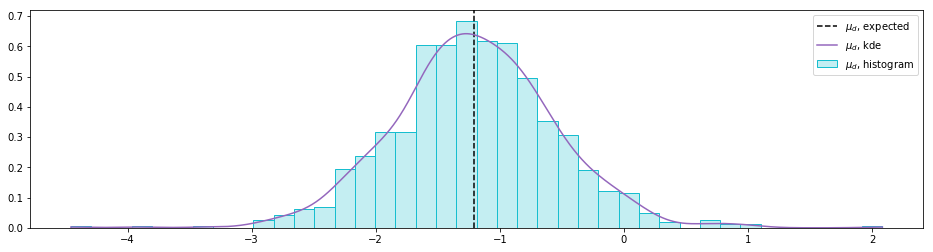

In [20]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.hist(mu_d, normed = True, bins = 40, fc=(23/255, 190/255, 207/255, 0.25), linestyle = '-', linewidth = 1, label = '$\mu_d$, histogram', edgecolor='C9')
ax.axvline(mu_d.mean(), color='Black',  label = '$\mu_d$, expected', linestyle = '--')
x = np.linspace(mu_d.min(), mu_d.max(), 1000)
mu_d_kde = stats.gaussian_kde(mu_d).evaluate(x)
ax.plot(x, mu_d_kde, color = 'C4',  label = '$\mu_d$, kde')
ax.legend(loc = 'upper right')
None

####  b) Are the means the same?
Explain your reasoning with a couple of sentences.

We can see that the two means 95% confidence interval overlaps - e.g. the CI for $\mu_d$ includes 0. The overlap is though quite small small:

In [21]:
print('Mean 1 - 95% central CI : {:.2f} - {:.2f}'.format(*tuple(np.percentile(mu_1, q = [2.5, 97.5]))))
print('Mean 2 - 95% central CI : {:.2f} - {:.2f}'.format(*tuple(np.percentile(mu_2, q = [2.5, 97.5]))))
print('---------------------------------------')
print('Diff.  - 95% central CI : {:.2f} - {:>5.2f}'.format(*tuple(np.percentile(mu_d, q = [2.5, 97.5]))))

Mean 1 - 95% central CI : 13.46 - 15.76
Mean 2 - 95% central CI : 15.28 - 16.35
---------------------------------------
Diff.  - 95% central CI : -2.43 -  0.02


We can also visualize the overlap using kernel density estimation: 

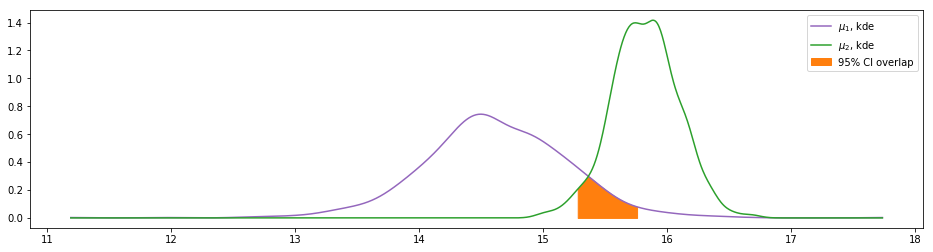

In [22]:
fig, ax = plt.subplots(figsize = (16, 4))
mu_all = np.concatenate([mu_1, mu_2])
x = np.linspace(mu_all.min(), mu_all.max(), 1000)
mu_1_kde = stats.gaussian_kde(mu_1).evaluate(x)
mu_2_kde = stats.gaussian_kde(mu_2).evaluate(x)
ax.plot(x, mu_1_kde, color = 'C4',  label = '$\mu_1$, kde')
ax.plot(x, mu_2_kde, color = 'C2',  label = '$\mu_2$, kde')
kde_min = np.stack([mu_1_kde, mu_2_kde], axis = 1).min(axis = 1)
x_95_idx = (np.percentile(mu_2, q = 2.5) < x) & (x < np.percentile(mu_1, q = 97.5))
plt.fill_between(x[x_95_idx], kde_min[x_95_idx], color='C1', label = '95% CI overlap')
ax.legend(loc = 'upper right')
None

We compute the probability that $\mu_1 < \mu_2$, e.g. $\mu_d < 0$:

In [23]:
np.mean(mu_d < 0) 

0.96899999999999997

We conclude that there is a 97.2% chance that $\mu_1 < \mu_2$. 